## 配合课件Algorithm Analysis的相关代码

### 算法效率评估中运行时间函数中起决定性作用的函数是哪一部分？
1. 构建下面3个运行时间函数：
T1(n) = 20n^2^ + 10n + 10000
T2(n) = n^2^ + 100n + 20
T3(n) = 100nlogn + 5n + 30
2. 测试n<100时上面三个函数的增长变化趋势
3. 测试n>1000时上面三个函数的增长变化趋势

In [1]:
# 导入本次笔记所需要的所有包
import math
import random
import time
import matplotlib.pyplot as plt
import numpy as np

In [1]:
def t1(n):
    return 20*math.pow(n, 2) + 10*n + 10000

def t2(n):
    return math.pow(n, 2) + 100*n + 20

def t3(n):
    return 100*n*math.log2(n) + 5*n + 30

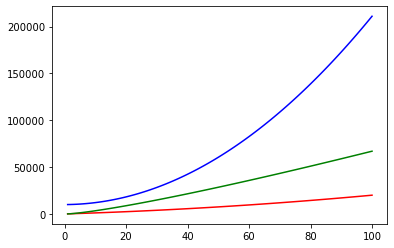

In [7]:
# 测试n<100时三个函数的增长变化趋势
y1 = []
y2 = []
y3 = []
for i in range(1, 101):
    y1.append(t1(i))
    y2.append(t2(i))
    y3.append(t3(i))
x = np.linspace(1, 100, 100)
fig, ax = plt.subplots()
ax.plot(x, y1, 'b')
ax.plot(x, y2, 'r')
ax.plot(x, y3, 'g')
plt.show()

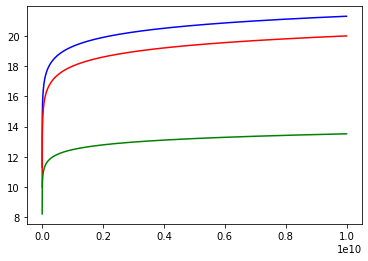

In [9]:
# 测试3个函数在n>10^5次时的增长变化趋势
# 为了更好的展现结果，将运行函数的结果做了取10为底的对数值
y1, y2, y3 = [], [], []
for i in range(10**5, 10**10, 10000):
    y1.append(math.log10(t1(i)))
    y2.append(math.log10(t2(i)))
    y3.append(math.log10(t3(i)))
x = np.linspace(10**5, 10**10, 999990)
fig, ax = plt.subplots()
ax.plot(x, y1, 'b')
ax.plot(x, y2, 'r')
ax.plot(x, y3, 'g')
plt.show()

### 最大子序列和问题的展示

In [24]:
# 创建一个生成指定数量个数的随机值列表
def generateRandomNumbers(scope, count):
    numbers = [random.randint(-scope, scope) for i in range(count)]
    return numbers

# 不进行任何优化的算法，采用了3重循环完成求解
def maxSubSum1(numbers):
    maxSum = 0
    for i in range(len(numbers)):
        for j in range(i, len(numbers)):
            thisSum = 0
            for k in range(i, j+1):
                thisSum += numbers[k]
            if thisSum > maxSum:
                maxSum = thisSum
    return maxSum
numbers = generateRandomNumbers(100, 100)
print(maxSubSum1(numbers))

1176


In [31]:
# 创建测试不同算法方案执行的框架函数
def testmaxSubSumFrame(function, randomScope, maxDataSize, step):
    '''
    :param function: 需要调用的函数的名字
    :param randomScope: 生成的随机数的值的范围
    :param maxDataSize: 要处理的问题的数据最大规模
    :param step: 数据规模之间的步长
    '''
    elapsedTimes = []
    dataSizes = [i for i in range(10, maxDataSize+1, step)]
    for dataSize in dataSizes:
        numbers = generateRandomNumbers(randomScope, dataSize)
        start = time.time_ns()
        function(numbers)
        elapsedTimes.append(time.time_ns()-start)
        #time.sleep(1)
    x = np.linspace(10, maxDataSize, len(dataSizes))
    fig, ax = plt.subplots()
    ax.plot(x, elapsedTimes)
    plt.show()

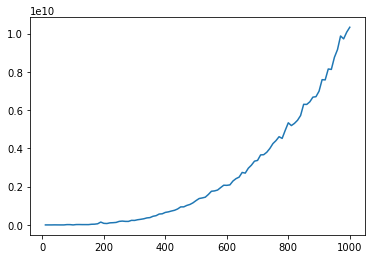

In [8]:
# 运行第一种解决方案，记录在不同数据规模下的运行时间
testmaxSubSumFrame(maxSubSum1, 100, 1000, 10)

In [26]:
# 去掉最内层的这个多余的循环改进之后的第二个算法
def maxSubSum2(numbers):
    maxSum = 0
    for i in range(len(numbers)):
        thisSum = 0
        for j in range(i, len(numbers)):
            thisSum += numbers[j]
            if thisSum > maxSum:
                maxSum = thisSum
    return maxSum

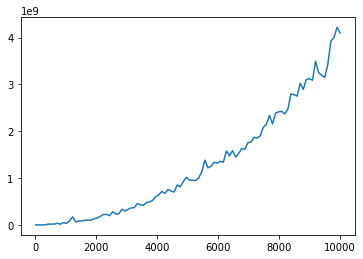

In [32]:
# 运行第二种解决方案，记录在不同数据规模下的运行时间
testmaxSubSumFrame(maxSubSum2, 100, 10000, 100)

In [16]:
# 采用分治策略思想
def maxSubSum3_help(numbers, left, right):
    if left == right:
        return numbers[left]
    center = left + (right - left)//2
    maxLeftSum = maxSubSum3_help(numbers, left, center)
    maxRightSum = maxSubSum3_help(numbers, center+1, right)
    maxLeftBorderSum = numbers[center]
    leftBorderSum = 0
    cursor = center
    while cursor >= left:
        leftBorderSum += numbers[cursor]
        if leftBorderSum > maxLeftBorderSum:
            maxLeftBorderSum = leftBorderSum
        cursor -= 1
    maxRightBorderSum = numbers[center+1]
    rightBorderSum = 0
    cursor = center + 1
    while cursor <= right:
        rightBorderSum += numbers[cursor]
        if rightBorderSum > maxRightBorderSum:
            maxRightBorderSum = rightBorderSum
        cursor += 1
    return max([maxLeftSum, maxRightSum, maxLeftBorderSum+maxRightBorderSum])

def maxSubSum3(numbers):
    return maxSubSum3_help(numbers, 0, len(numbers)-1)

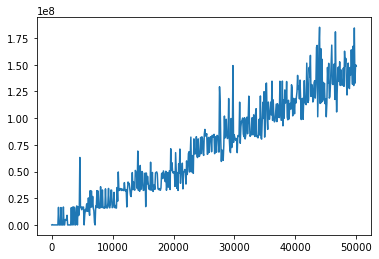

In [37]:
# 运行第三种解决方案，记录在不同数据规模下的运行时间
testmaxSubSumFrame(maxSubSum3, 100, 50000, 100)